In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
cookies=pd.ExcelFile('cookies_comp_students.xlsx')
df_train = pd.read_excel(cookies, 'cookies_train')
df_test = pd.read_excel(cookies, 'cookies_test')

In [4]:
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,peanut butter,1.36,3
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,raisins,1.80,3
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,"chocolate, oats",1.07,3
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,chocolate,1.77,3


In [5]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [15]:
cookies.columns = ['sugar_flour_ratio', 'sugar_index', 'bake_temp', 'chill_time',
       'calories', 'density', 'pH', 'gr_baking_soda', 'bake_time',
       'quality', 'butter_type', 'weight', 'diameter', 'mixins',
       'crunch_factor', 'aesthetic_appeal']

<AxesSubplot:xlabel='gr_baking_soda'>

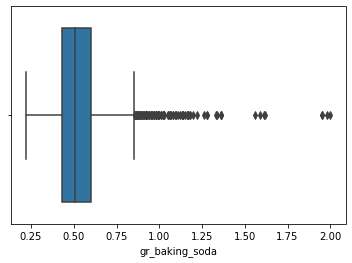

In [18]:
sns.boxplot(cookies.gr_baking_soda)

In [26]:
cookies_clean=pd.read_csv('clean_cookies.csv')

In [27]:
cookies_clean

,Unnamed: 0,sugar_to_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,grams_baking_soda,bake_time,quality,butter_type,weight,mixins,crunch_factor
0,0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30
1,1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71
2,2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78
3,3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59
4,4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,5138,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,peanut butter,1.36
5139,5139,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,raisins,1.80
5140,5140,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,"chocolate, oats",1.07
5141,5141,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,chocolate,1.77


In [28]:
cookies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5143 non-null   int64  
 1   sugar_to_flour_ratio  5143 non-null   float64
 2   sugar_index           5143 non-null   float64
 3   bake_temp             5143 non-null   int64  
 4   chill_time            5143 non-null   float64
 5   calories              5143 non-null   float64
 6   density               5143 non-null   float64
 7   pH                    5143 non-null   float64
 8   grams_baking_soda     5143 non-null   float64
 9   bake_time             5143 non-null   float64
 10  quality               5143 non-null   int64  
 11  butter_type           5143 non-null   object 
 12  weight                5143 non-null   float64
 13  mixins                5143 non-null   object 
 14  crunch_factor         5143 non-null   float64
dtypes: float64(10), int64